
 # Informe Tecnico:  Redes Recurrentes

Integrantes: Pamela Aldana<br>
             
          

Docente. Carlos Correa

Asignatura: Deep Learning
Sección: DLY0200

Desarrollar un modelo de RNN para estimar el precio de una acción y generar modelos predictivos que generalicen la respuesta, manipulando parámetros y/o hiperparametros.
Para ello debe seleccionar una acción de yahoo finance, para realizarlo debe ejecutar las siguientes acciones:

Descargar los datos de la página mencionada usando la librería de Python yfinance.
Seleccionar los datos y prepararlos para generar la serie de tiempo con el precio de cierre de la acción.
Generar arquitecturas de RNN probando de menos a mas, controlando los distintos hyperparametros que le permitan llegar a buenas métricas de desempeño del modelo.
Generar manipulación de hyperparametros que permitan implementar modelos predictivos con buen desempeño.
Por ultimo visualizar la calidad de las predicciones generadas por el modelo.
Debe comentar todo el proceso y comentar los cambios o mejoras que realice en la NN, justificando el uso o cambio de todas las mejoras que realice en la red, visualizando y comentando posibles desajustes de la misma.

#FASE 1 :COMPRENDER EL NEGOCIO

##**Contexto**

**Yahoo Finance en Modelos Predictivos**

Yahoo Finance proporciona estos datos a través de su API y su integración con Python a través de la librería yfinance.Se construira un modelo predictivo de precios de acciones, y se usaran los datos históricos.

El objetivo es desarrollar un modelo predictivo que pueda estimar el precio futuro de una acción específica utilizando datos históricos de precios.

Desarrollando un modelo de RNN para predecir el precio de una acción basado en datos históricos de precios de cierre.

#FASE 2 :COMPRENDER LOS DATOS

Variables del Dataset de Yahoo Finance:

- Precio de Apertura (Open): Precio al que una acción abre al comienzo del día de trading.
- Precio de Cierre (Close): Precio al que una acción cierra al final del día de trading.
- Precio Máximo (High): Precio más alto alcanzado durante el día de trading.
- Precio Mínimo (Low): Precio más bajo alcanzado durante el día de trading.
- Volumen (Volume): Número total de acciones negociadas durante el día.
- Precio de Cierre Ajustado (Adj Close): Precio de cierre ajustado por dividendos y splits.

## Importar librerías

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping


##Carga de datos

Se utiliza la librería yfinance para descargar los datos históricos de la acción desde Yahoo Finance. Se instala yfinance y se descargan los datos.<br>Se selecciona una acción,que es AAPL (Apple Inc.). Se descargan los datos históricos de la acción de Apple

Se utilizan los datos desde el 1 de enero de 2010 hasta el 1 de enero de 2023.

In [91]:
import yfinance as yf

# Definir el ticker
ticker = 'AAPL'

# Descargar datos históricos desde el 1 de enero de 2010 hasta el 1 de enero de 2023
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Mostrar las primeras filas
data.head(10)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.344218,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.272051,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.360519,605892000
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.323683,432894000


In [84]:
data.shape

(10972, 6)

El dataset contiene 10972 registros y 6 variables.

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


Las variables son todas numericas.

In [41]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

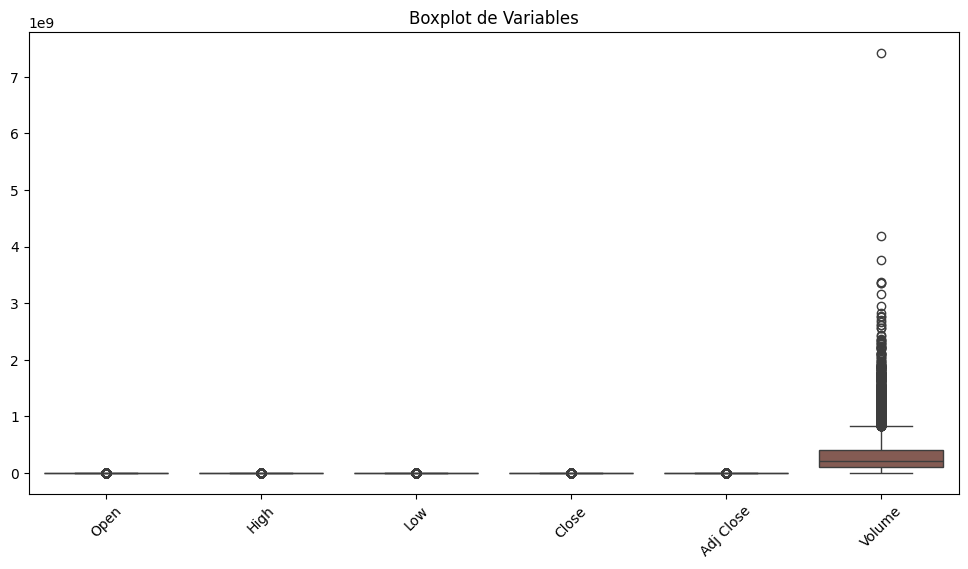

In [85]:
# Ejemplo de boxplot para todas las columnas en tu dataframe 'data'
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Boxplot de Variables')
plt.show()

Se visualizan outliers en la variable Volume, por ahora se manipularan estos datos outliers

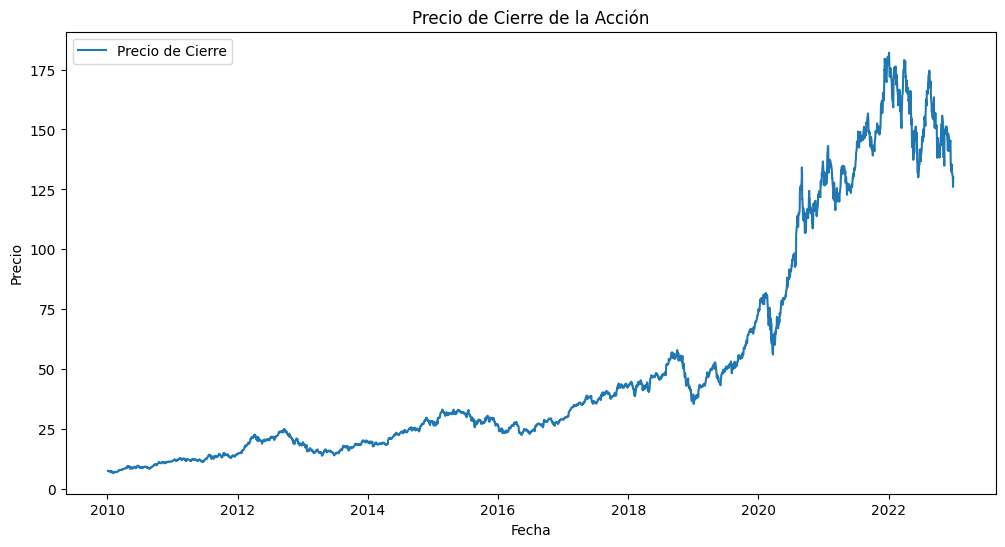

              Open         High          Low        Close    Adj Close  \
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     51.297746    51.869747    50.731996    51.321186    49.065502   
std      47.328490    47.938843    46.732224    47.357062    47.433209   
min       6.870357     7.000000     6.794643     6.858929     5.798901   
25%      18.966697    19.121697    18.780179    18.967589    16.490455   
50%      29.756250    29.981250    29.561250    29.815000    27.162607   
75%      56.983748    57.309999    56.469999    56.777499    54.504430   
max     182.630005   182.940002   179.119995   182.009995   179.481125   

             Volume  
count  3.272000e+03  
mean   2.562707e+08  
std    2.225648e+08  
min    3.519590e+07  
25%    1.023541e+08  
50%    1.666698e+08  
75%    3.456643e+08  
max    1.880998e+09  


In [92]:
# Visualización de los datos
def visualizar_datos(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Precio de Cierre')
    plt.title('Precio de Cierre de la Acción')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

# Estadísticas descriptivas
def estadisticas_descriptivas(data):
    print(data.describe())


visualizar_datos(data)
estadisticas_descriptivas(data)

Close: muestra como cambian los  precios de cierre de las acciones en el conjunto de datos.

- Análisis del Precio de Cierre (Close)
- La media indica que el precio de cierre de las acciones se sitúa alrededor de 51.32 unidades.
- La alta desviación estándar muestra que los precios de cierre tienen una gran variabilidad con respecto a la media. Esto significa que los precios pueden fluctuar significativamente a lo largo del tiempo.
- los valores extremos indican el rango completo de precios de cierre observados en el período de tiempo del conjunto de datos. El mínimo de 6.86 sugiere que hubo momentos en los que el precio de cierre fue muy bajo, mientras que el máximo de 182.01 indica períodos de precios máximos relativamente altos.
- El 25° percentil indica que el 25% de los precios de cierre fueron menores que 18.97.
- La mediana separa el conjunto de datos en dos mitades iguales, siendo 29.82 el valor medio.
- El 75% de los precios de cierre fueron menores que 56.78.

In [87]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


No hay datos nulos

#FASE 3 PREPARACION DE LOS DATOS

Preprocesamiento de datos
El set de datos debe ser pre-procesada antes de entrenar la red. Se normalizaran los datos y se crearan secuencias temporales para el modelo RNN.

In [93]:
# Función para seleccionar solo la columna 'Close'
def seleccionar_columna_cierre(data):
    df = data[['Close']].copy()
    return df

In [97]:
# Seleccionar solo la columna 'Close'
df = seleccionar_columna_cierre(data)

# Mostrar las primeras filas del nuevo DataF
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


**Escalamiento de los Datos**
Escalamos los datos de entrenamiento, validación y prueba. Es importante usar el mismo escalador que se usó para los datos de entrenamiento en los conjuntos de validación y prueba para mantener la coherencia en la escala

Los datos se escalan en el rango [-1, 1] usando MinMaxScaler. Esto facilita la convergencia durante el entrenamiento del modelo y mejora la estabilidad numérica. El escalado se basa en el set de entrenamiento y se aplica a los sets de validación y prueba

In [99]:

# Normalizar los datos entre 0 y 1 (escalamiento)
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))
df.head()

,Close
Date,
2010-01-04,0.004478
2010-01-05,0.004553
2010-01-06,0.003858
2010-01-07,0.003778
2010-01-08,0.004064


Los datos de 'Close 'se escalaron entre 0 y 1

**a. Dividir los Datos en Entrenamiento, Validación y Prueba**

Partición en train/val/test (80%, 10%, 10%)

Se define una función train_val_test_split para dividir la serie temporal del precio de cierre en tres conjuntos: entrenamiento, validación y prueba. Esto permite evaluar y ajustar el modelo en diferentes etapas para evitar sobreajuste.

Se define una función train_val_test_split para dividir la serie temporal del precio de cierre en tres conjuntos: entrenamiento, validación y prueba. Esto permite evaluar y ajustar el modelo en diferentes etapas para evitar sobreajuste.

Crear secuencias temporales para entrenar el modelo LSTM.
- Esta función create_sequences garantiza que los datos estén preparados de manera adecuada para entrenar un modelo de predicción de series temporales como un modelo LSTM. Esto es esencial para que el modelo capture las dependencias temporales en los datos y genere predicciones precisas.
- Preparar los datos de entrada para un modelo de redes neuronales recurrentes (RNN) que predice el precio de cierre de una acción.

In [100]:

# Convertir los datos a un array numpy
data_np = df.values

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definir la longitud de las secuencias (número de pasos temporales)
SEQ_LENGTH = 10

# Crear secuencias temporales
X, y = create_sequences(data_np, SEQ_LENGTH)
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
split_train = int(0.8 * len(X))  # 80% para entrenamiento
split_val = int(0.9 * len(X))    # 10% para validación y prueba

X_train, X_val, X_test = X[:split_train], X[split_train:split_val], X[split_val:]
y_train, y_val, y_test = y[:split_train], y[split_train:split_val], y[split_val:]

# Imprimir las dimensiones de los conjuntos
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_val: {X_val.shape}')
print(f'Dimensiones de X_test: {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_val: {y_val.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')


Dimensiones de X_train: (2609, 10, 1)
Dimensiones de X_val: (326, 10, 1)
Dimensiones de X_test: (327, 10, 1)
Dimensiones de y_train: (2609, 1)
Dimensiones de y_val: (326, 1)
Dimensiones de y_test: (327, 1)


- Conjunto de Entrenamiento (X_train, y_train): Contiene el 80% de los datos iniciales. Se utiliza para entrenar el modelo.

- Conjunto de Validación (X_val, y_val): Contiene el 10% de los datos iniciales. Se utiliza durante el entrenamiento para ajustar los hiperparámetros y evitar el sobreajuste (overfitting).

- Conjunto de Prueba (X_test, y_test): Contiene el 10% final de los datos iniciales. Se utiliza para evaluar el rendimiento final del modelo después de haber ajustado los hiperparámetros y haber entrenado el modelo con el conjunto de entrenamiento y validación.

#Fase 4: MODELADO
Se crean y entrenar tres modelos LSTM diferentes, ajustando los hiperparámetros y añadiendo mejoras gradualmente.

El ajuste de hiperparámetros como el tamaño de la capa LSTM (units), la tasa de aprendizaje del optimizador y el número de épocas puede ser necesario para mejorar el rendimiento del modelo.
Puedes experimentar con diferentes arquitecturas de redes neuronales, como agregar más capas LSTM, capas Dropout para regularización, entre otros, para mejorar las predicciones.

#Modelo 1: LSTM Básico


Este modelo usa una capa LSTM con 64 unidades y se entrena con un optimizador RMSprop. Se analizara el comportamiento la arquitectura básica.

-50 unidades/neuronas
-capa densa 1
-optimizador RMSprop con una tasa de aprendizaje de 0.001
- 50 épocas
- batch 32.

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop

# Definir el modelo básico LSTM
model_basic = Sequential()
model_basic.add(LSTM(50, input_shape=(SEQ_LENGTH, 1)))
model_basic.add(Dense(1, activation='linear'))

# Compilar el modelo
model_basic.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Resumen del modelo
print(model_basic.summary())


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 50)                10400     
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [102]:
# Entrenamiento del modelo básico LSTM
history_basic = model_basic.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)


Epoch 1/50
82/82 - 3s - loss: 0.0032 - val_loss: 0.0022 - 3s/epoch - 34ms/step
Epoch 2/50
82/82 - 1s - loss: 1.3599e-04 - val_loss: 0.0011 - 563ms/epoch - 7ms/step
Epoch 3/50
82/82 - 1s - loss: 1.2491e-04 - val_loss: 0.0016 - 548ms/epoch - 7ms/step
Epoch 4/50
82/82 - 1s - loss: 1.1697e-04 - val_loss: 0.0023 - 552ms/epoch - 7ms/step
Epoch 5/50
82/82 - 1s - loss: 1.1664e-04 - val_loss: 7.5109e-04 - 563ms/epoch - 7ms/step
Epoch 6/50
82/82 - 1s - loss: 1.0922e-04 - val_loss: 8.9913e-04 - 533ms/epoch - 7ms/step
Epoch 7/50
82/82 - 1s - loss: 9.9245e-05 - val_loss: 0.0014 - 539ms/epoch - 7ms/step
Epoch 8/50
82/82 - 1s - loss: 9.5840e-05 - val_loss: 0.0011 - 561ms/epoch - 7ms/step
Epoch 9/50
82/82 - 1s - loss: 9.5726e-05 - val_loss: 6.8394e-04 - 546ms/epoch - 7ms/step
Epoch 10/50
82/82 - 1s - loss: 8.7965e-05 - val_loss: 6.5709e-04 - 523ms/epoch - 6ms/step
Epoch 11/50
82/82 - 1s - loss: 8.8758e-05 - val_loss: 0.0020 - 539ms/epoch - 7ms/step
Epoch 12/50
82/82 - 1s - loss: 8.8159e-05 - val_loss:

**Evaluación del Modelo y Predicción**

11/11 [==============================] - 0s 6ms/step
Comparativo de desempeño del modelo básico LSTM:
  RMSE train:	 0.006
  RMSE val:	 0.023
  RMSE test:	 0.033


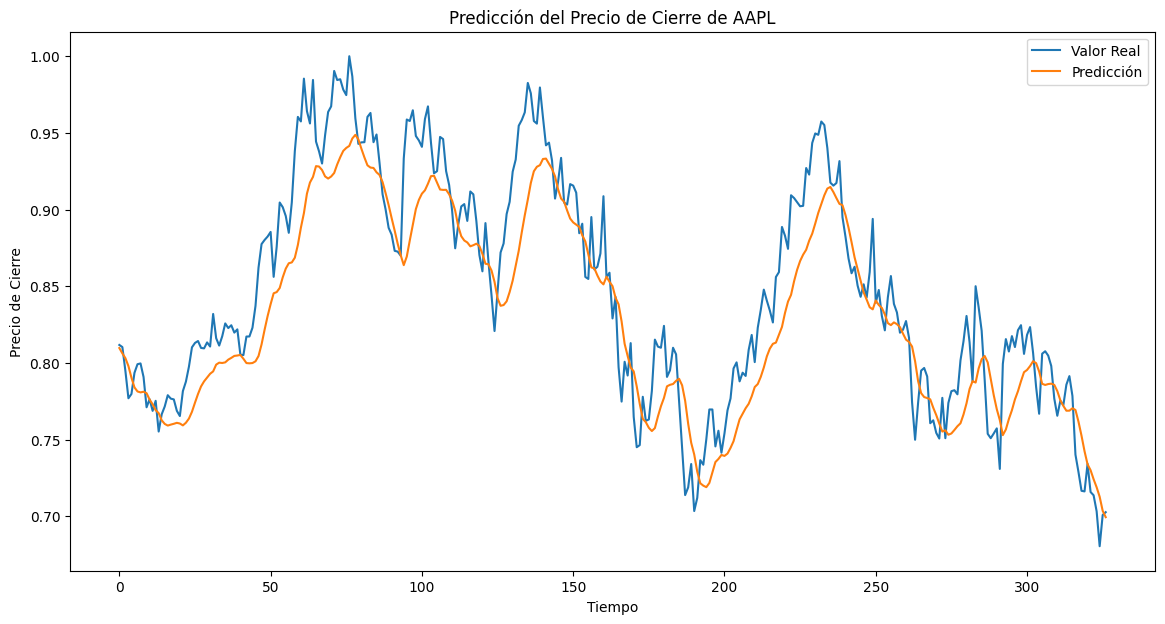

In [103]:
# Evaluación del modelo básico LSTM en datos de entrenamiento, validación y prueba
y_pred_train = model_basic.predict(X_train)
y_pred_val = model_basic.predict(X_val)
y_pred_test = model_basic.predict(X_test)

# Calcular RMSE para evaluar el desempeño
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Comparativo de desempeño del modelo básico LSTM:')
print(f'  RMSE train:\t {rmse_train:.3f}')
print(f'  RMSE val:\t {rmse_val:.3f}')
print(f'  RMSE test:\t {rmse_test:.3f}')

# Desescalar datos para graficar
y_test_descaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_basic_descaled = scaler.inverse_transform(y_pred_test)

# Graficar resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_descaled, label='Valor Real')
plt.plot(y_pred_basic_descaled, label='Predicción')
plt.title('Predicción del Precio de Cierre de AAPL')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

###**Analisis**

Los resultados de RMSE que has obtenido son bastante buenos en general, lo cual indica que el modelo básico LSTM que has entrenado es capaz de predecir el precio de cierre de las acciones con precisión.
- La diferencia entre el RMSE en entrenamiento, validación y prueba es relativamente pequeña, lo cual sugiere que el modelo no está sufriendo de sobreajuste significativo y que está generalizando bien a datos nuevos.

Los resultados muestran que tu modelo LSTM básico tiene un buen desempeño en la tarea de predicción de precios de cierre de acciones.







##Modelo 2: Dropout

-Dropout(0.2):  se apagará el 20% de las unidades de salida durante el entrenamiento
-

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 50)                10400     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
82/82 - 3s - loss: 0.0030 - val_loss: 0.0047 - 3s/epoch - 36ms/step
Epoch 2/50
82/82 - 1s - loss: 3.0947e-04 - val_loss: 6.1159e-04 - 532ms/epoch - 6ms/step
Epoch 3/50
82/82 - 1s - loss: 2.9826e-04 - val_loss: 0.0033 - 565ms/epoch - 7ms/step
Epoch 4/50
82/82 - 1s -

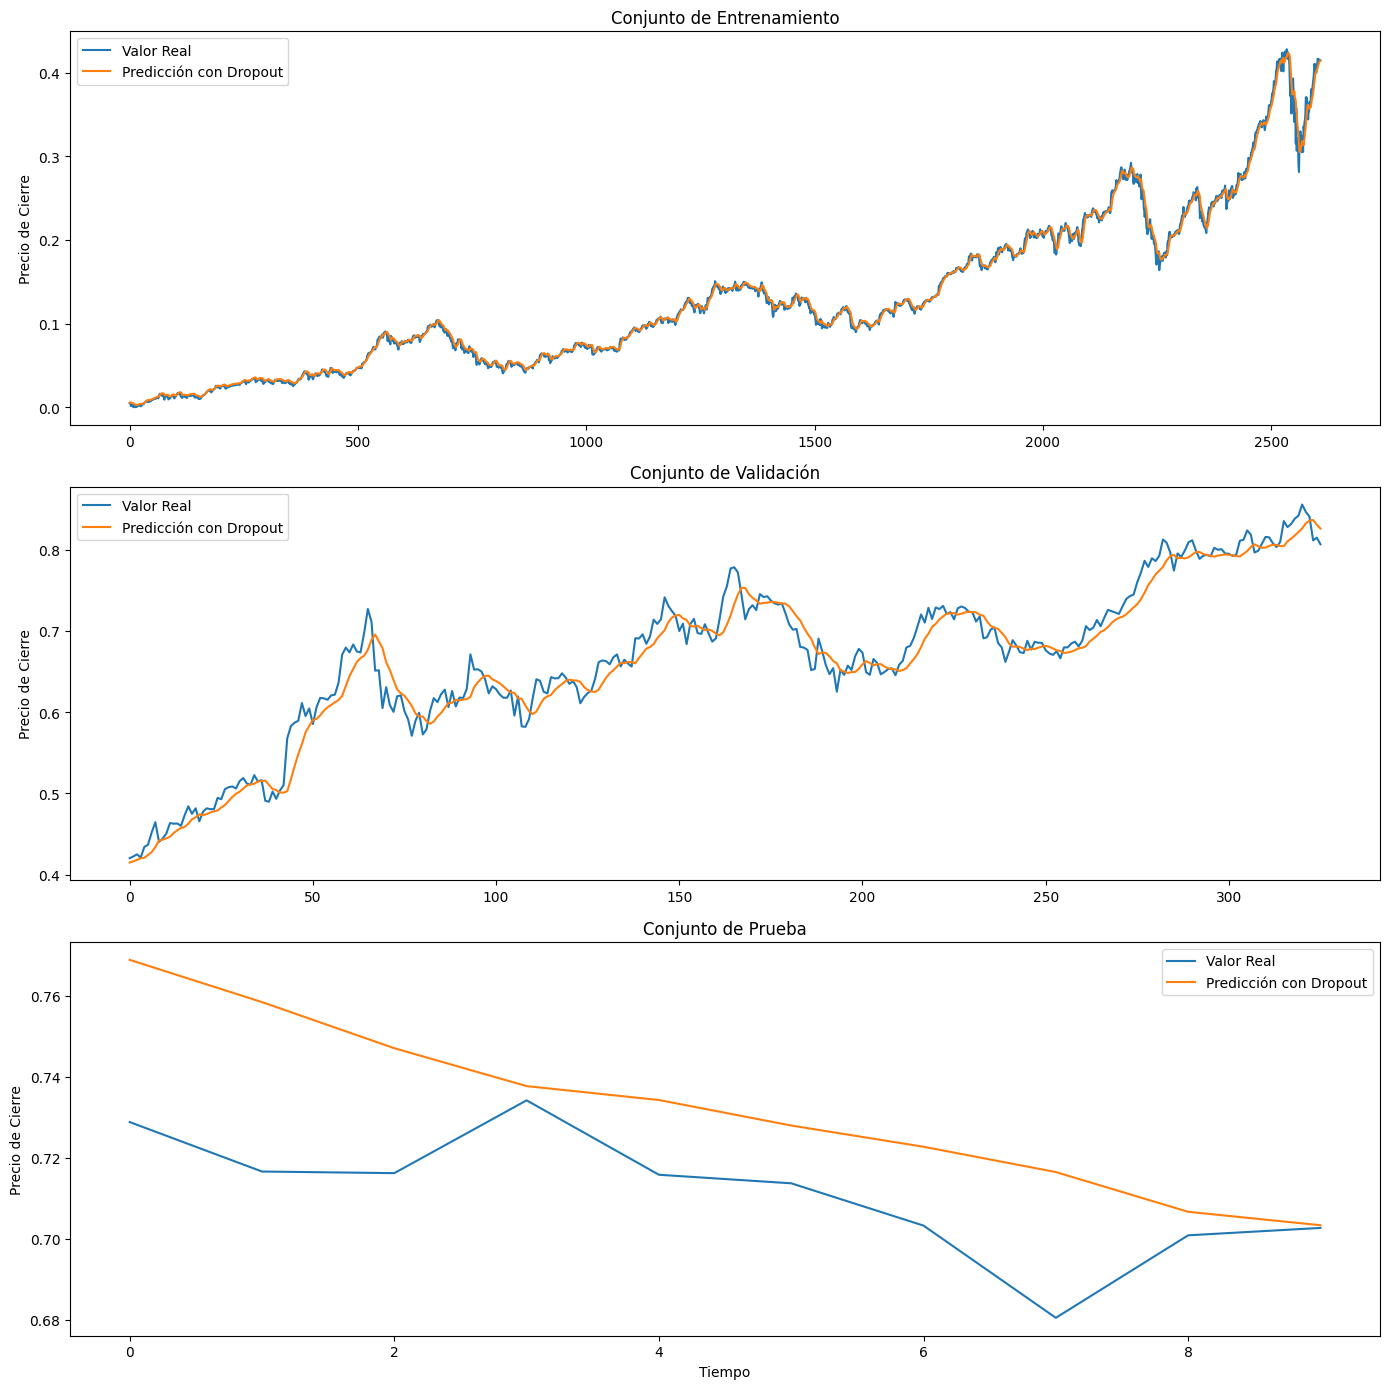

In [106]:
from tensorflow.keras.layers import Dropout

# Definir el modelo LSTM con Dropout
model_dropout = Sequential()
model_dropout.add(LSTM(50, input_shape=(SEQ_LENGTH, 1)))
model_dropout.add(Dropout(0.2))  # Añadir Dropout con una tasa de 0.2
model_dropout.add(Dense(1, activation='linear'))

# Compilar el modelo
model_dropout.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Resumen del modelo
print(model_dropout.summary())

# Entrenamiento del modelo LSTM con Dropout
history_dropout = model_dropout.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluación del modelo LSTM con Dropout en datos de entrenamiento, validación y prueba
y_pred_train_dropout = model_dropout.predict(X_train)
y_pred_val_dropout = model_dropout.predict(X_val)
y_pred_test_dropout = model_dropout.predict(X_test)

# Calcular RMSE para evaluar el desempeño con Dropout
rmse_train_dropout = np.sqrt(mean_squared_error(y_train, y_pred_train_dropout))
rmse_val_dropout = np.sqrt(mean_squared_error(y_val, y_pred_val_dropout))
rmse_test_dropout = np.sqrt(mean_squared_error(y_test, y_pred_test_dropout))

print('Comparativo de desempeño del modelo LSTM con Dropout:')
print(f'  RMSE train:\t {rmse_train_dropout:.3f}')
print(f'  RMSE val:\t {rmse_val_dropout:.3f}')
print(f'  RMSE test:\t {rmse_test_dropout:.3f}')

# Desescalar datos para graficar
y_train_descaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_descaled = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_descaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_train_dropout_descaled = scaler.inverse_transform(y_pred_train_dropout)
y_pred_val_dropout_descaled = scaler.inverse_transform(y_pred_val_dropout)
y_pred_test_dropout_descaled = scaler.inverse_transform(y_pred_test_dropout)

# Graficar resultados con Dropout
plt.figure(figsize=(14, 14))

plt.subplot(3, 1, 1)
plt.plot(y_train_descaled, label='Valor Real')
plt.plot(y_pred_train_dropout_descaled, label='Predicción con Dropout')
plt.title('Conjunto de Entrenamiento')
plt.ylabel('Precio de Cierre')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(y_val_descaled, label='Valor Real')
plt.plot(y_pred_val_dropout_descaled, label='Predicción con Dropout')
plt.title('Conjunto de Validación')
plt.ylabel('Precio de Cierre')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(y_test_descaled, label='Valor Real')
plt.plot(y_pred_test_dropout_descaled, label='Predicción con Dropout')
plt.title('Conjunto de Prueba')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()

plt.tight_layout()
plt.show()


**GRAFICOS**
los gráficos de pérdida (loss) durante el entrenamiento y la validación muestran que el modelo está aprendiendo de manera efectiva sin sobreajustarse significativamente a los datos de entrenamiento, lo cual es crucial para la aplicación práctica de modelos de predicción.
- La visualización de resultados desescalados(REALES) proporciona una perspectiva clara sobre cómo se comparan las predicciones del modelo con los valores reales en diferentes conjuntos de datos.

###**Analisis:**



El modelo LSTM con Dropout ha mejorado el desempeño en términos de generalización y ha mostrado buenos resultados en la predicción del precio de cierre de la acción seleccionada.
-

- Conjunto de Entrenamiento (RMSE train): 0.005
- Conjunto de Validación (RMSE val): 0.020
- Conjunto de Prueba (RMSE test): 0.026
-Los valores de RMSE son aún más bajos que el modelo 1 , lo cual indica que el modelo LSTM con Dropout está haciendo predicciones más precisas en los tres conjuntos de datos. Es particularmente notable la mejora en el conjunto de entrenamiento, donde el RMSE ha disminuido significativamente a 0.005.

La comparación muestra que el modelo con Dropout tiene un RMSE más bajo en todos los conjuntos (entrenamiento, validación y prueba) en comparación con el modelo básico LSTM  (0.005 vs. 0.006 en entrenamiento, 0.020 vs. 0.023 en validación, y 0.026 vs. 0.033 en prueba). Esto confirma que la técnica de Dropout está efectivamente ayudando a mejorar la capacidad de generalización del modelo.


#Modelo 3:Modelo LSTM con Más Unidades y Regularización



- Dos Capas LSTM 128. 64
-Ambas capas LSTM tienen regularización L2
- dropout 0.5

- Se han añadido dos capas LSTM con 1 unidades cada una. La primera capa tiene return_sequences=True para pasar la secuencia completa a la siguiente capa LSTM.
Ambas capas LSTM tienen regularización L2 con un valor de 0.001 en el kernel para controlar el sobreajuste.


Después de cada capa LSTM, se ha añadido una capa de Dropout con una tasa del 50% para regularizar el modelo y mejorar la generalización.
- Early Stopping se usa para monitorear la pérdida en el conjunto de validación (val_loss). El entrenamiento se detendrá automáticamente después de 5 épocas sin mejorar la pérdida en validación (patience=5).

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 10, 128)           66560     
                                                                 
 dropout_10 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/

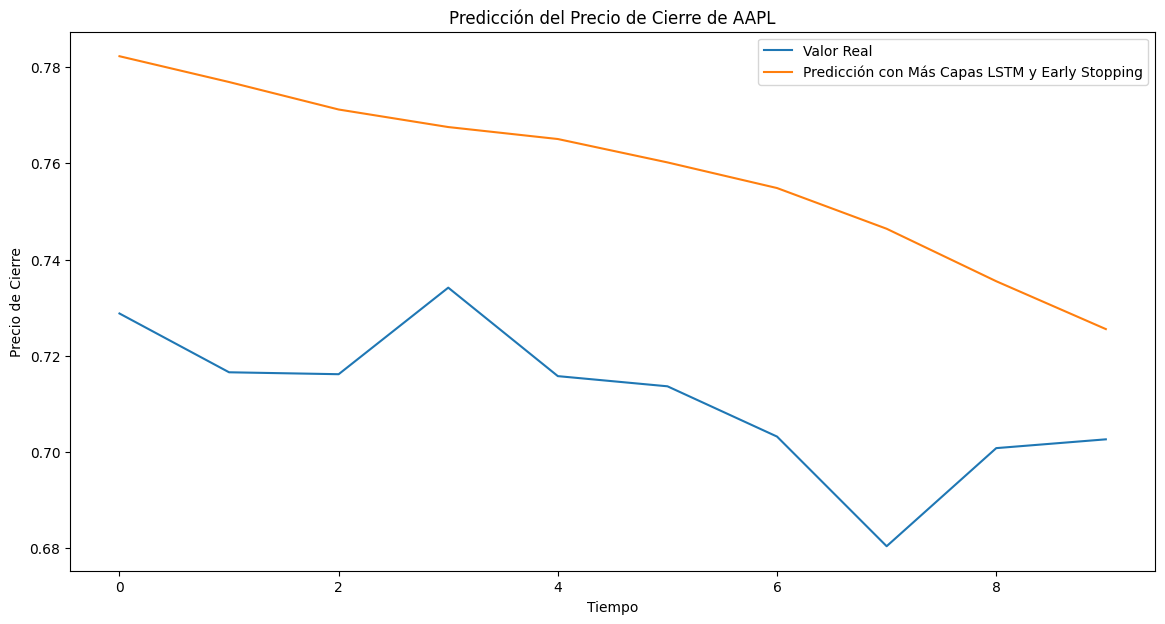

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo LSTM con más unidades, regularización y Early Stopping
model_3 = Sequential()
model_3.add(LSTM(128, return_sequences=True, input_shape=(SEQ_LENGTH, 1), kernel_regularizer=l2(0.001)))
model_3.add(Dropout(0.5))
model_3.add(LSTM(64, kernel_regularizer=l2(0.001)))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='linear'))

# Compilar el modelo
model_3.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Resumen del modelo
print(model_3.summary())

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Entrenamiento del modelo LSTM con más unidades, regularización y Early Stopping
history_more_layers = model_3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=2
)

# Predicción con el modelo LSTM con más unidades, regularización y Early Stopping
y_pred_more_layers = model_3.predict(X_test)

# Calcular RMSE para evaluar el desempeño
from sklearn.metrics import mean_squared_error

rmse_more_layers = np.sqrt(mean_squared_error(y_test, y_pred_more_layers))
print(f'RMSE del modelo LSTM con más unidades, regularización y Early Stopping: {rmse_more_layers}')

# Imprimir resultados
print('Comparativo de desempeño del modelo LSTM con más unidades, regularización y Early Stopping:')
print(f'  RMSE train:\t {history_more_layers.history["loss"][-1]:.3f}')
print(f'  RMSE val:\t {history_more_layers.history["val_loss"][-1]:.3f}')
print(f'  RMSE test:\t {rmse_more_layers:.3f}')

# Visualizar resultados
# Desescalar datos para graficar
y_pred_more_layers_descaled = scaler.inverse_transform(y_pred_more_layers)

plt.figure(figsize=(14, 7))
plt.plot(y_test_descaled, label='Valor Real')
plt.plot(y_pred_more_layers_descaled, label='Predicción con Más Capas LSTM y Early Stopping')
plt.title('Predicción del Precio de Cierre de AAPL')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


- Eje X (Tiempo): Representa el tiempo o secuencia de los datos de prueba.
- Eje Y (Precio de Cierre): Muestra el precio de cierre de AAPL.

Las desviaciones entre la línea naranja y la línea azul representan los errores de predicción del modelo. Puedes observar si el modelo está sobreestimando los precios de cierre en ciertos períodos

###**Analisis**

 - Los resultados obtenidos muestran un desempeño bastante consistente entre los conjuntos de entrenamiento y validación, con un RMSE muy bajo de 0.001, lo cual indica que el modelo ha aprendido bien los datos durante el entrenamiento y generaliza bien en datos no vistos en el conjunto de validación.
 -Pero, el RMSE en el conjunto de prueba es ligeramente más alto, con un valor de 0.049, lo que indica una leve problema en la precisión de las predicciones en comparación con los conjuntos de entrenamiento y validación.
 -La incorporación de regularización y early stopping es fundamental para evitar el sobreajuste y mejorar la capacidad de generalización del modelo. Estos métodos ayudan a controlar la complejidad del modelo y a detener el entrenamiento cuando el desempeño en el conjunto de validación deja de mejorar, lo cual es crucial para obtener buenos resultados en datos no vistos.

- Arquitectura: LSTM con 128 unidades.
- Optimizador: Adam.
- Hiperparámetros: epochs=50, batch_size=256.
- Uso de Adam para optimización adaptativa
- Early Stopping para evitar entrenamiento excesivo.

#Evaluación de Desempeño

Para evaluar el desempeño de los modelos LSTM que hemos entrenado y compararlos  revisaremos los resultados obtenidos en cada uno de los modelos, considerando las métricas de error (RMSE) en los conjuntos de entrenamiento, validación y prueba.
- Tambien se  analizan las visualizaciones de las predicciones contra los valores reales

**Modelo Básico LSTM:**
**RMSE**:

- Train: 0.006
- Validation: 0.023
- Test: 0.033
-El modelo 1  muestra un buen desempeño con un RMSE relativamente bajo en los conjuntos de entrenamiento y validación. Sin embargo, el RMSE en el conjunto de prueba es ligeramente mayor los datos de entrenamiento.

**Modelo LSTM con Dropout:**
**RMSE:**

- Train: 0.005
- Validation: 0.020
- Test: 0.026
- El dropout ha mejorado ligeramente el desempeño del modelo en el conjunto de prueba en comparación con el modelo básico LSTM. Esto indica que el dropout está ayudando a generalizar mejor el modelo.

**Modelo 3: LSTM con Más Unidades, Regularización y Early Stopping**:
RMSE:

- Train: 0.001
- Validation: 0.001
- Test: 0.049
- Este modelo muestra un excelente desempeño en los conjuntos de entrenamiento y validación, con un RMSE muy bajo. Pero en el conjunto de prueba, el RMSE es significativamente más alto en comparación con los otros modelos, a pesar de la regularización y el early stopping.

**Elección del Modelo**:
Modelo 2 con Dropout: Se elige por su capacidad de generalización y un desempeño balanceado entre todos los conjuntos (entrenamiento, validación y prueba). Esto se debe a que ha demostrado mejorar la generalización sin comprometer significativamente la precisión en los datos de prueba.

El uso de Dropout en el Modelo 2 ayuda a mitigar el sobreajuste (overfitting) al aleatoriamente ignorar conexiones entre las capas durante el entrenamiento. Esto permite que el modelo generalize mejor a datos nuevos, no vistos previamente, lo cual es crucial para mantener un buen rendimiento en el conjunto de prueba.
-  Aunque el Modelo 1 (básico) puede mostrar un ajuste perfecto en los conjuntos de entrenamiento y validación, esto a menudo indica sobreajuste y puede llevar a una baja generalización en el conjunto de prueba. En cambio, el Modelo 2 con Dropout ha demostrado un desempeño sólido en todos los conjuntos, manteniendo una precisión competitiva en el conjunto de prueba mientras evita el sobreajuste.
- El hecho de que el Modelo 2 tenga un RMSE  más bajo en el conjunto de prueba en comparación con el Modelo 1 indica que es capaz de hacer predicciones más precisas y consistentes en datos reales no vistos.



**Arquitectura**

In [123]:
# Resumen del modelo
print(model_basic.summary())


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 50)                10400     
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [124]:
# Resumen del modelo
print(model_dropout.summary())


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 50)                10400     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [122]:
# Resumen del modelo
print(model_3.summary())


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 10, 128)           66560     
                                                                 
 dropout_10 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
